# Inaugural Project

Imports and set magics

In [264]:
# importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as optimize
import pandas as pd
import math
from tabulate import tabulate

# autoreload modules
%load_ext autoreload
%autoreload 2

# Import my model from pyfile
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Question 1**

To illustrate how changes in $\alpha$ and $\sigma$ affects how females relative to males work at home, I create a figure

In [265]:
# (a) Defining the model based on the pyfile
HSM = HouseholdSpecializationModelClass()


# (b) Defining alpha and sigma as lists
alpha_vec = [0.25, 0.5, 0.75]
sigma_vec = [0.5, 1, 1.5]


# (c) Creating a dataframe
df = pd.DataFrame(columns=alpha_vec, index=sigma_vec)


# (d) Loop over every sigma for every alpha
for alpha in alpha_vec:
    for sigma in sigma_vec:

        # (i) define parameteres in the model
        HSM.par.alpha = alpha
        HSM.par.sigma = sigma

        # (ii) defining the discrete model
        model_discrete = HSM.solve_discrete()

        # (iii) defining the ratio between worked hours in home for females relative to males
        ratio = model_discrete.HF / model_discrete.HM

        # (iv) adding the ratio to the dataframe
        df.loc[alpha, sigma] = ratio.round(3)


# (e) Arranging the table
df = df.drop(index=[1, 1.5], columns=[0.25, 0.75])
df = df.reindex([0.25, 0.50, 0.75])
df = df.rename_axis('alpha', axis=0).rename_axis('sigma', axis=1)
column = pd.MultiIndex.from_tuples([('', alpha_vec[0]), ('alpha', alpha_vec[1]), ('', alpha_vec[2])])
df.columns = column
row = pd.MultiIndex.from_tuples([('', sigma_vec[0]), ('sigma', sigma_vec[1]), ('', sigma_vec[2])])
df.index = row

# (f) printing the table
print("Table 1: Illustration of changes in ratio of household work when varying alpha and sigma")
print(df.to_string(index=True, header=True, float_format="{:.2f}".format, justify="center"))


c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python\inauguralproject\inauguralproject.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python\inauguralproject\inauguralproject.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))


Table 1: Illustration of changes in ratio of household work when varying alpha and sigma
               alpha     
          0.25  0.50 0.75
      0.5 0.55  0.31 0.21
sigma 1.0 1.00  1.00 1.00
      1.5 1.83  3.25 4.67


$\alpha/(1-\alpha)$ is the productivity in home production for females relative to males. 

$\sigma$ is the elasticity of substitution between female's and male's hours spend working at home.

Table 1 illustrates changes in the ratio of home production for females relative to males, when the parameters of $\alpha$ and $\sigma$ changes. 

When $\alpha$ increases while $\sigma$ is contant but differs from 1, the ratio of home labour (females relative to males) increases. Explained intuitively, when females become more productive at home ($\alpha$ increases) it is most optimal for the aggregated utility of the household that females allocate more time working at home relative to male. 

When $\sigma$ equals 1, the elasticity of substitution is elastic, which implies that changes in the productivity ($\alpha$) does not have an effect on the ratio of hours spend with home labour for females relative to males. In other words, when the elasticity of substitution is elastic, the relative productivity between females and males has no influence of the hours spend working at home.

## **Question 2**

In the following, the ratio of hours worked at home ($ratio_h$) relative to the ratio of wage ($ratio_w$) is illustrated in the figure below. Only, the wage of females changes and so the wage of males is constant. 

As earlier, *ratio* refers to females relative to males. 


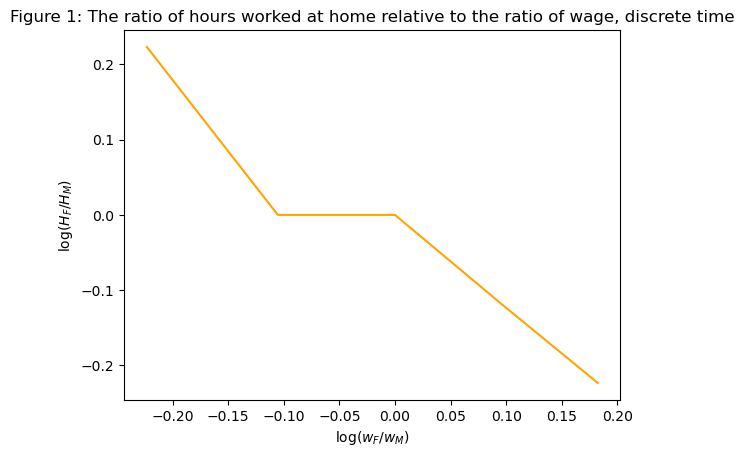

In [266]:
# (a) Setting the initial values of alpha and sigma
HSM.par.alpha = 0.5
HSM.par.sigma = 1


# (b) Creating empty lists for the ratio of home labour and the ratio of wage
ratio_h = []
ratio_w = []


# (c) creating a loop over every wage of females 
for wF in [0.8, 0.9, 1, 1.1, 1.2]:

        # (i) defining parameteres in the model
        HSM.par.wF = wF
        
        # (ii) defining the discrete method
        model_discrete = HSM.solve_discrete()

        # (iii) defining the log ratio of hours worked at home
        ratio_h.append(np.log(model_discrete.HF / model_discrete.HM))

        # (iv) defining the log ratio of wage
        ratio_w.append(np.log(wF / HSM.par.wM))


# (d) plotting the figure
plt.plot(ratio_w, ratio_h, color='orange')
plt.xlabel('log($w_F$/$w_M$)', fontsize=10)
plt.ylabel('log($H_F$/$H_M$)', fontsize=10)
plt.title('Figure 1: The ratio of hours worked at home relative to the ratio of wage, discrete time')
plt.show()


Figure 1 illustrates that when the wage of females increases (relative to the males), female work less at home relative to men, because the alternative costs of women working at home increases. Explained intuitively, when female's salery increases, females work more at their paid jobs, which forces men to work more in the home.

## **Question 3**

The further analysis is based on time use data, which implies that the following analysis is in contiuous time. This is in constract to question 1-2 where the model was solved in discretional time.

c:\Users\CAAL\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:565: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


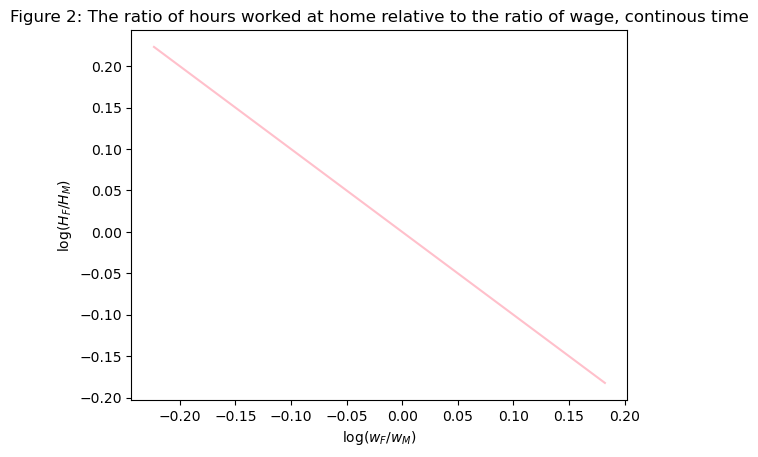

In [267]:
# (a) Creating empty lists
ratio_h_cont = []
ratio_w_cont = []


# (b) creating a loop over the wage of females
for wF in [0.8, 0.9, 1, 1.1, 1.2]:
    
        # (i) defining parameteres in the model
        HSM.par.wF = wF
        
        # (ii) defining the contiuous method
        opt = HSM.solve_con()

        # (iii) defining the ratio of hours worked at home (log)
        ratio_h_cont.append(np.log(opt.HF/opt.HM))

        # (iv) defining the log ratio of wage
        ratio_w_cont.append(np.log(wF/HSM.par.wM))

# (c) plotting the figure
plt.plot(ratio_w_cont, ratio_h_cont, color='pink')
plt.xlabel('log($w_F$/$w_M$)', fontsize=10)
plt.ylabel('log($H_F$/$H_M$)', fontsize=10)
plt.title('Figure 2: The ratio of hours worked at home relative to the ratio of wage, continous time')
plt.show()

Figure 2 illustrates the relationship between the ratio of home labour and ration of salery as figure 1. However, since the figure is based on continous time, the graph is more smooth. I use Nelder-Mead instead of SQLS to get the best fit

As in figure 1, $\alpha$ is $0.5$, which implies that the productivity of the genders is equal.
$\sigma$ is 1, which implies elasticity of substitution, and so the genders can switch without any effects.

Based on the values of $\sigma$ and $\alpha$, females and males adjust their home labour in the aim to increase their utility, when the wage of the females (relative to males) increases. 

## **Question 4**

The further analysis is based on the paper *Specialization, Comparative Advantage and the Sexual Division of Labor* by Siminski and Yetsenga (2022). Inspired by the paper, I run the following regression

$$
log(H_F/H_M))=\beta_0 + beta_1 * log (w_F/w_H)
$$ 

In the further analysis, I will estimate $\alpha$ and $\sigma$ so that the following equations are minimized and thereby fitt the model the best: 

$$
(\beta_0-\hat\beta_0)^2
$$
$$(\beta_1-\hat\beta_1)^2
$$ 

Optimal alpha = 0.9820
Optimal sigma = 0.1000
Beta_0 = 0.40
Beta_1 = -0.10


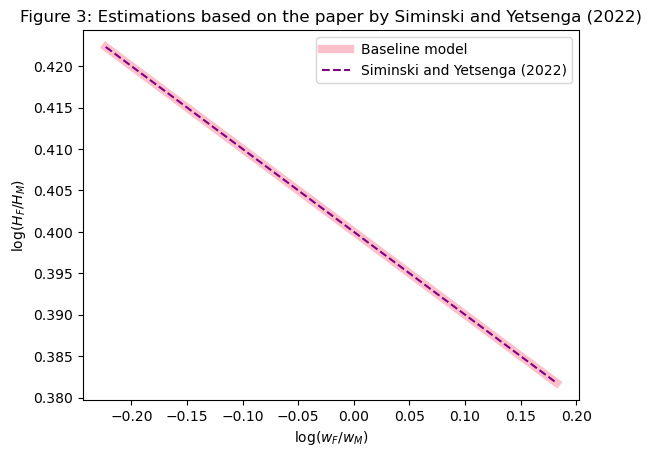

In [268]:
# (a) Finding the optimal values for alpha and sigma
HSM.estimate()


# (b) Printing the estimated values of beta_0 and beta_1
print(f'Beta_0 = {HSM.sol.beta_0:.2f}')
print(f'Beta_1 = {HSM.sol.beta_1:.2f}')


# (c) Defining the ratio of hours worked at home
ratio_h = np.log(HSM.sol.HF_vec / HSM.sol.HM_vec)


# (d) creating and adjusting the figure
figure3 = plt.figure()
ax = figure3.add_subplot(1, 1, 1)
ax.plot(np.log(HSM.par.wF_vec),ratio_h, color = 'pink', label = 'Baseline model', linewidth=6)
ax.plot(np.log(HSM.par.wF_vec), HSM.par.beta_0_target + HSM.par.beta_1_target * np.log(HSM.par.wF_vec), linestyle='--', color='purple', label = 'Siminski and Yetsenga (2022)')


# (e) adjusting the figure
ax.set_title('Figure 3: Estimations based on the paper by Siminski and Yetsenga (2022)')
ax.set_xlabel('log($w_F$/$w_M$)')
ax.set_ylabel('log($H_F$/$H_M$)')
ax.legend()


First, I have estimated $\alpha$ and $\sigma$ so that $(\beta_0-\hat\beta_0)^2$ and $(\beta_1-\hat\beta_1)^2$ are minimized. This is done by the classic minimization statement, where I again use a Nelder-Mead method. The optimal parameters are given by;
$$
\alpha = 0.9820
$$
$$
\sigma = 0.1000
$$
Then, I use the parameter estimates of $\alpha$ and $\sigma$ to calculate $\beta_0$ and $\beta_1$:
$$
\beta_0 = 0.40
$$
$$
\beta_1 = -0.10
$$
which is identical to the estimated of Siminski and Yetsenga (2022). 

Figure 3 illustrates the regressions, and since I find identical values of $\beta_0$ and $\beta_1$, the two graphs are identical.

## **Question 5**

In the following, I assume that females and males are equally productive with home production, which implies that $\alpha=0.5$. Therefore, I restrict the model, so that the parameter of $\alpha$ is no longer 0.9820 as in *question 4* but 0.5.

I have chosen to extend my model with a conditional elasticity of substitution, inspired by the current maternity rules. The current rules stem from a societal desire to create more equality in wage levels for females and males. Research shows that men's and women's income develops similarly until the birth of the firstborned child. Then, females's gross income decreases relative to men's with almost 30 per cent (https://kvinfo.dk/barsel/). 

WIth the newest maternity regulation, both parents have 11 weeks of earmarked maternity, which implies that it cannot be transferred to the other parent. Therefore, the system holds some rigidity in the distribution of maternity, since almost 40 per cent is fixed. Opposite, if the parents do not want to loss a share of their maternity, they are forced to substitute between hours spend with home production. To simplify the model, $\sigma$ is constructed with limitations. The bounds for $\sigma$ is limited to [0.2: 0.8].

Optimal sigma = 0.20
Fixed alpha = 0.5
Beta_0 = 0.80
Beta_1 = -0.20


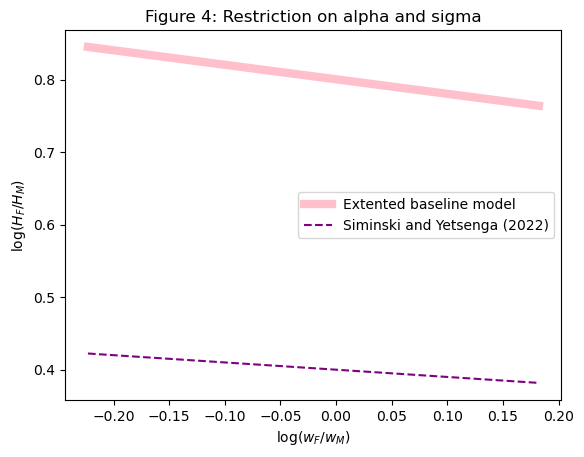

In [269]:
# (a) Finding the optimal value for sigma
HSM.extented()


# (b) Print alpha
print('Fixed alpha = 0.5')


# (c) Printing the estimated values of beta_0 and beta_1
print(f'Beta_0 = {HSM.sol.beta_0:.2f}')
print(f'Beta_1 = {HSM.sol.beta_1:.2f}')


# (d) Defining the ratio of hours worked at home
ratio_h = np.log(HSM.sol.HF_vec / HSM.sol.HM_vec)


# (e) Creating and adjusting the figure
figure4 = plt.figure()
ax = figure4.add_subplot(1, 1, 1)
ax.plot(np.log(HSM.par.wF_vec), ratio_h, label='Extented baseline model', color = 'pink', linewidth=6)
ax.plot(np.log(HSM.par.wF_vec), HSM.par.beta_0_target + HSM.par.beta_1_target * np.log(HSM.par.wF_vec), linestyle='--', color='purple', label='Siminski and Yetsenga (2022)')


# (f) Adjusting the figure
ax.set_title('Figure 4: Restriction on alpha and sigma')
ax.set_xlabel('log($w_F$/$w_M$)')
ax.set_ylabel('log($H_F$/$H_M$)')
ax.legend()

plt.show()

Implementation of limitations to the bound of $\sigma$ and a fixed alpha do not help match data. Since both parameters are limited, the minimization statement has constrained leeway and so the fit betweent the regressions become weaker. In other word, when the minimization statement can not minimize the gap between 
$$
\beta_0 = 0.40
$$
$$
\beta_1 = -0.10
$$
due to restrictions on the parameters, the results become different. 

By constraining $\sigma$ and $\alpha$, the graph shift upwards, which implies that the ratio of hours worked with home production for females relative to males increases. 

The slope of the graphs are relatively similar, which indicates, that an increase in wage for females (when wage for males is held constant) has similar implications for the ratio of hours spend with home labour as previously (*question 4*). However, the optimal $\sigma$ in *question 4* is 0.1, while the optimal $\sigma$ is 0.2 - the lowest possible value. This indicates that the substitution of work is a little more elastic than before.